### Laboratorium 4 - zadania

In [1]:
from skimage.segmentation import mark_boundaries, slic
import matplotlib.pyplot as plt
import numpy as np
import cv2

#### Zadanie 1

Dane są obrazy `tabby` i `pills`. Wykonaj dla nich segmentację przy użyciu algorytmu SLIC. Celem jest uzyskanie **jednolitych**  superpikseli, a więc zawierających tylko fragmenty obiektów lub tylko tła (a nie jednego i drugiego naraz). Przeanalizuj zachowanie algorytmu dla różnej liczby superpikseli i parametru sigma.

Zwróć uwagę, że wynikiem działania scikitowej implementacji SLIC - [`skimage.segmentation.slic`](https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.slic) - (podobnie jak wielu innych algorytmów klasyfikacyjnych) jest obraz typu `np.int64` przyporządkowujący każdemu pikselowi obrazu wejściowego indeks superpiksela. Takiej reprezentacji oczekuje też funkcja [`mark_boundaries`](https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.mark_boundaries).

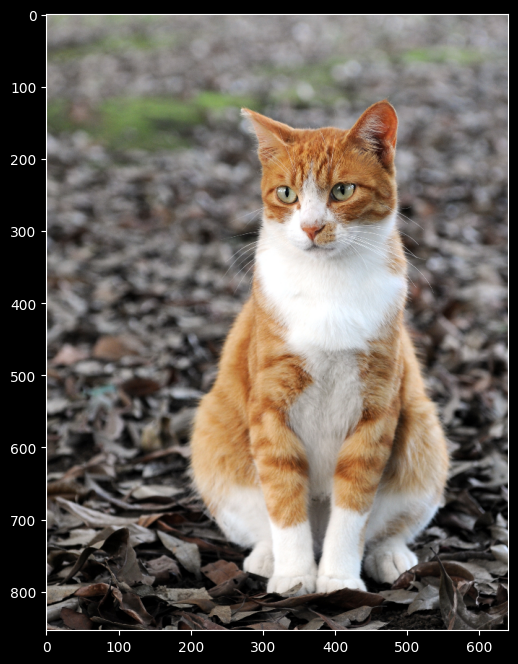

In [2]:
_ = cv2.imread('dane1-4/tabby.jpg')[..., ::-1]
tabby = cv2.resize(_, dsize=None, fx=0.3, fy=0.3)
plt.subplots(1,1,figsize=(8,8))[1].imshow(tabby);

In [3]:
tabby.shape

(854, 641, 3)

In [4]:
def display_image_and_histogram_hsv(image,  figsize=(12,6)):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(image_hsv)

    fig, axs = plt.subplots(2, 3, figsize=figsize)
    axs[0, 0].imshow(h, cmap='gray')
    axs[0, 0].set_title('Kanał Hue')
    axs[0, 0].axis('off')
    axs[0, 1].imshow(s, cmap='gray')
    axs[0, 1].set_title('Kanał Saturation')
    axs[0, 1].axis('off')
    axs[0, 2].imshow(v, cmap='gray')
    axs[0, 2].set_title('Kanał Value')
    axs[0, 2].axis('off')
    axs[1, 0].hist(h.ravel(), bins=256, color='gray')
    axs[1, 0].set_title('Histogram Hue')
    axs[1, 1].hist(s.ravel(), bins=256, color='gray')
    axs[1, 1].set_title('Histogram Saturation')
    axs[1, 2].hist(v.ravel(), bins=256, color='gray')
    axs[1, 2].set_title('Histogram Value')
    plt.tight_layout()
    plt.show()

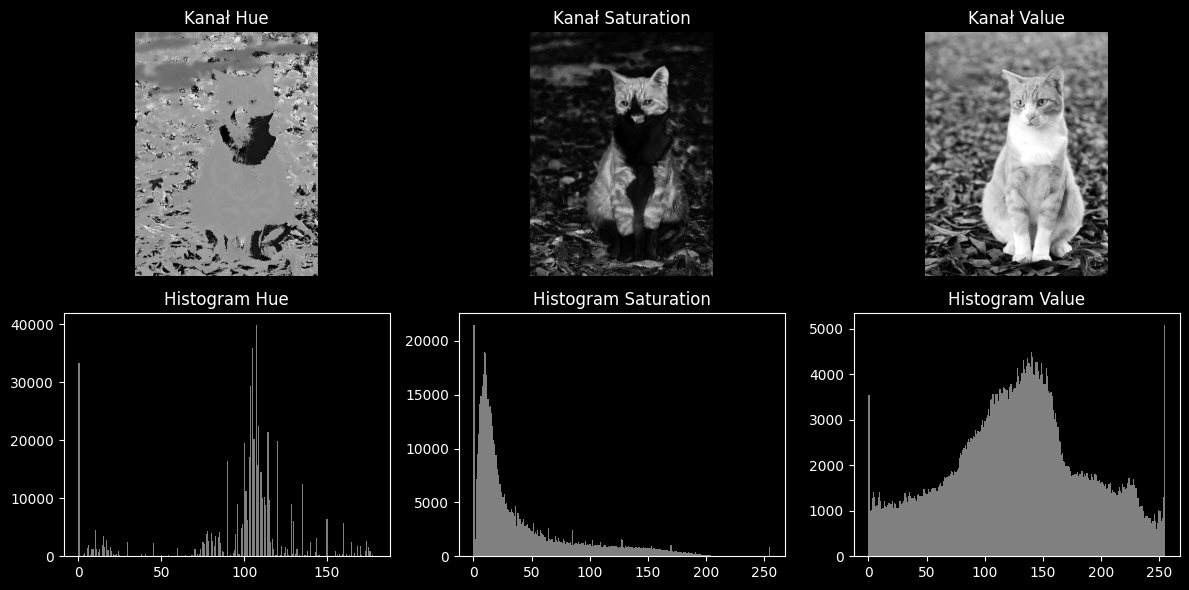

In [5]:
display_image_and_histogram_hsv(tabby)

In [6]:
def display_image_and_histogram(image, title="", figsize=(12,6)):
    fig, axes = plt.subplots(2, 1, figsize=figsize)
    
    axes[0].imshow(image)
    axes[0].set_title(title)
    axes[0].axis('off')
    
    color = ('r','g','b')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0,256])
        axes[1].plot(hist, color=col)
    
    axes[1].set_xlim([0,256])
    axes[1].set_title(f'Histogram RGB')
    plt.tight_layout()
    plt.show()

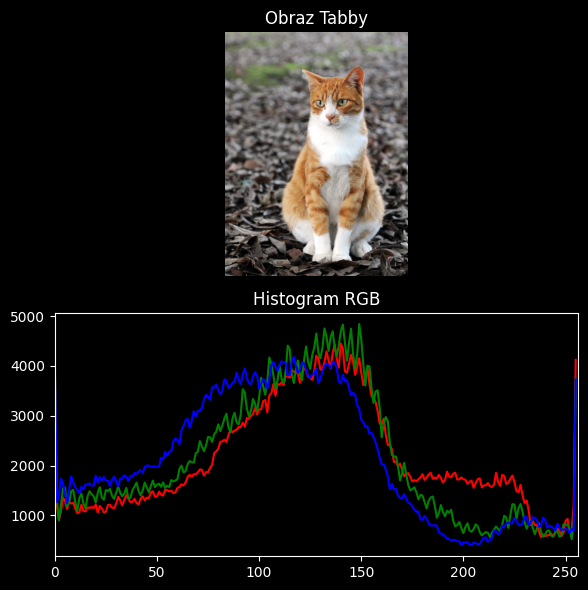

In [7]:
display_image_and_histogram(tabby, title="Obraz Tabby", figsize=(6, 6))

In [8]:
def apply_slic_segmentation(image, n_segments=250, sigma=1, compactness=10):

    segments = slic(image, n_segments=n_segments, sigma=sigma, compactness=compactness, start_label=1)
    segmented_image = mark_boundaries(image, segments, color=(1, 0, 0))
    return segmented_image, segments

In [9]:
def display_test_slic_parameters(image, n_segments_values, sigma_values, compactness):

    fig, axes = plt.subplots(len(n_segments_values), len(sigma_values),  figsize=(12, 24))

    for i, sigma in enumerate(sigma_values):
      for j, n_segments in enumerate(n_segments_values):
        segmented_img, segments = apply_slic_segmentation(image, n_segments=n_segments, sigma=sigma, compactness=compactness)
        ax = axes[j, i]
        ax.imshow(segmented_img)
        ax.set_title(f'n_segments={n_segments}, sigma={sigma}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

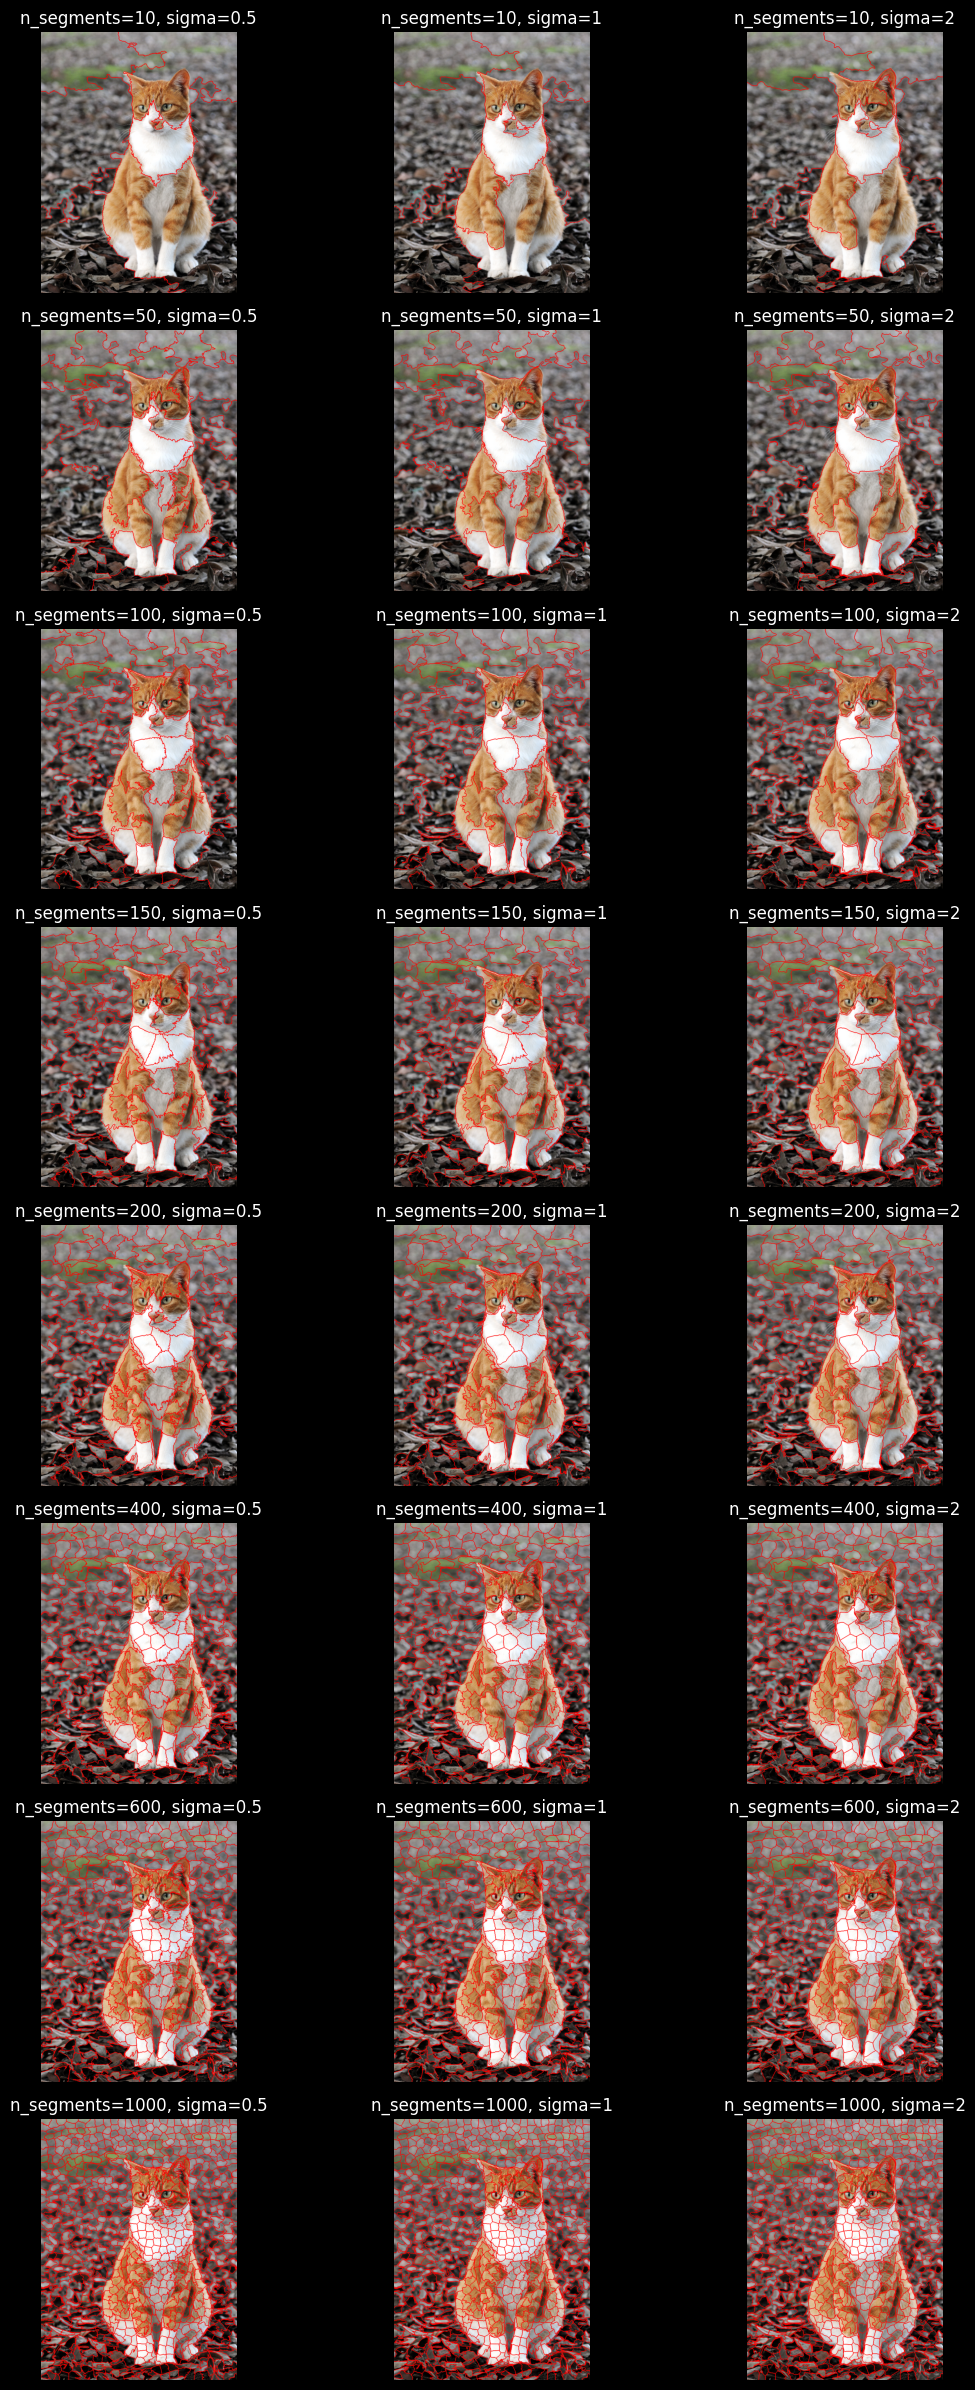

In [10]:
n_segments_values = [10, 50, 100, 150, 200, 400, 600, 1000] 
sigma_values = [0.5, 1, 2]
compactness = 10

display_test_slic_parameters(tabby,n_segments_values, sigma_values, compactness)

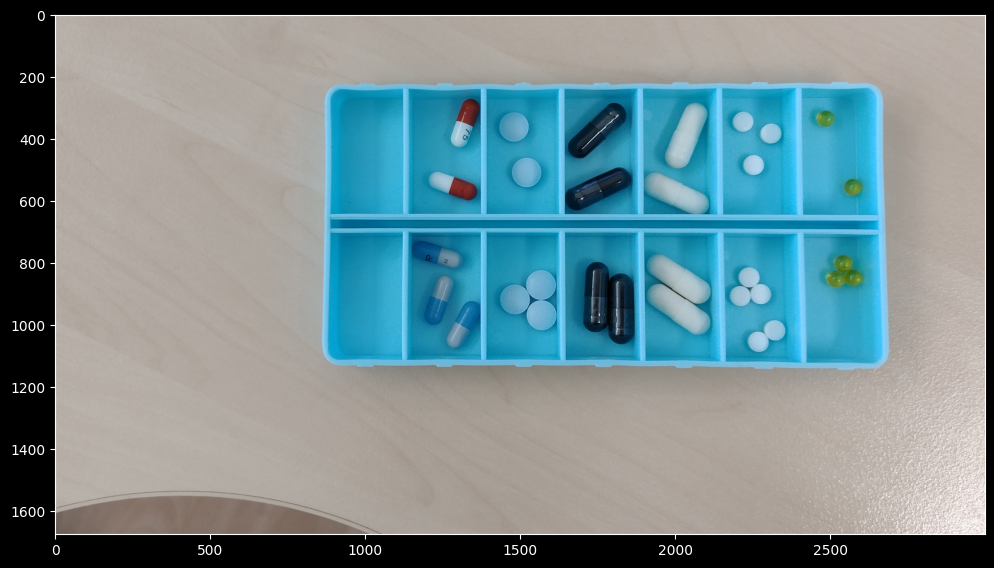

In [11]:
pills = cv2.imread('dane1-4/pills.png')[..., ::-1]
plt.subplots(1,1,figsize=(12,8))[1].imshow(pills);

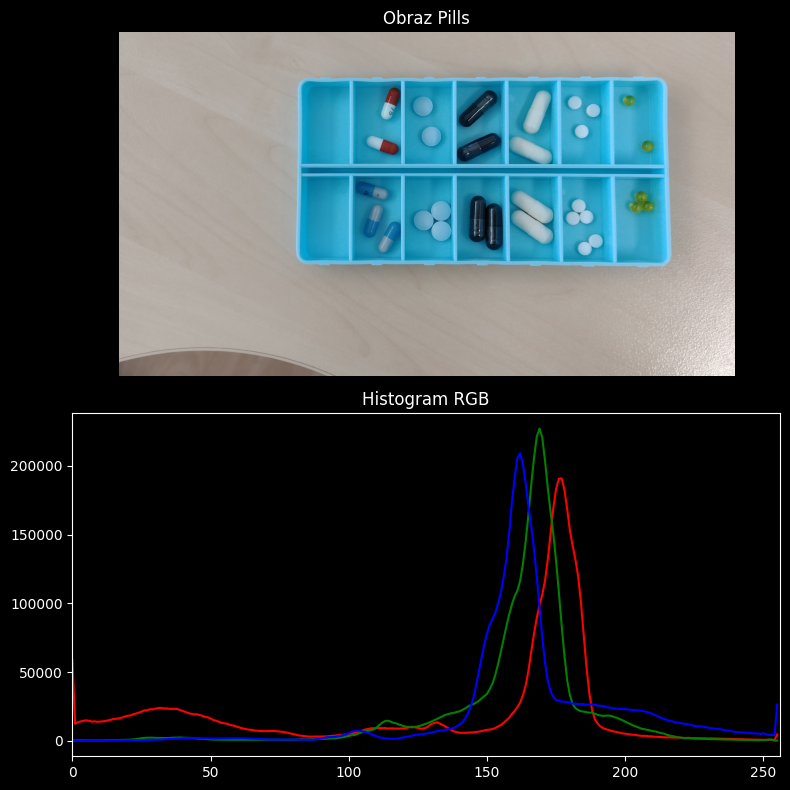

In [12]:
display_image_and_histogram(pills, title="Obraz Pills", figsize=(8,8))

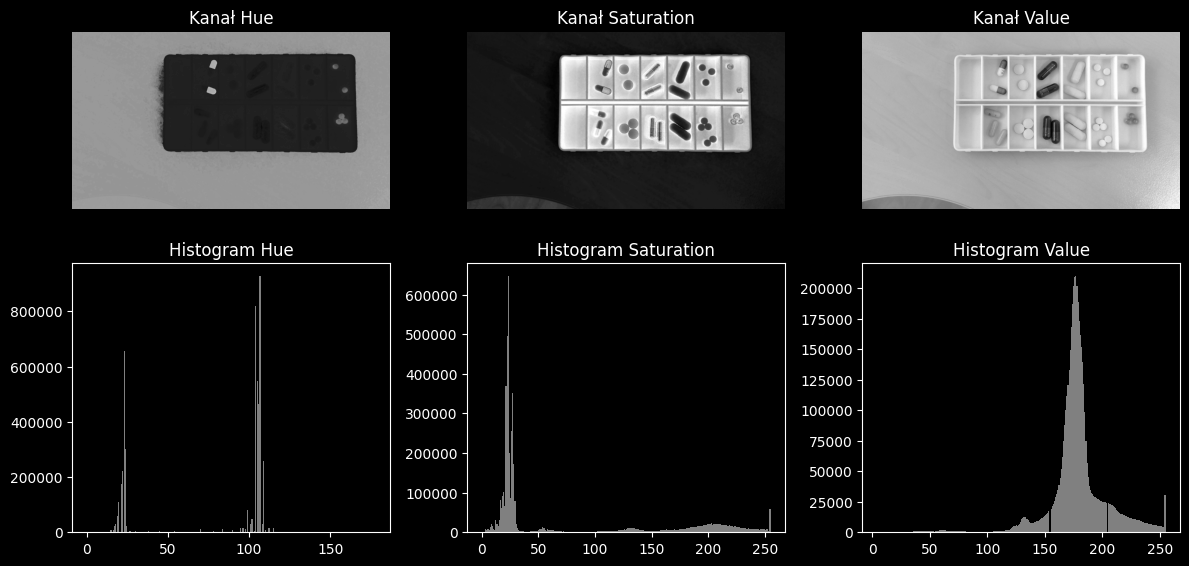

In [13]:
display_image_and_histogram_hsv(pills)

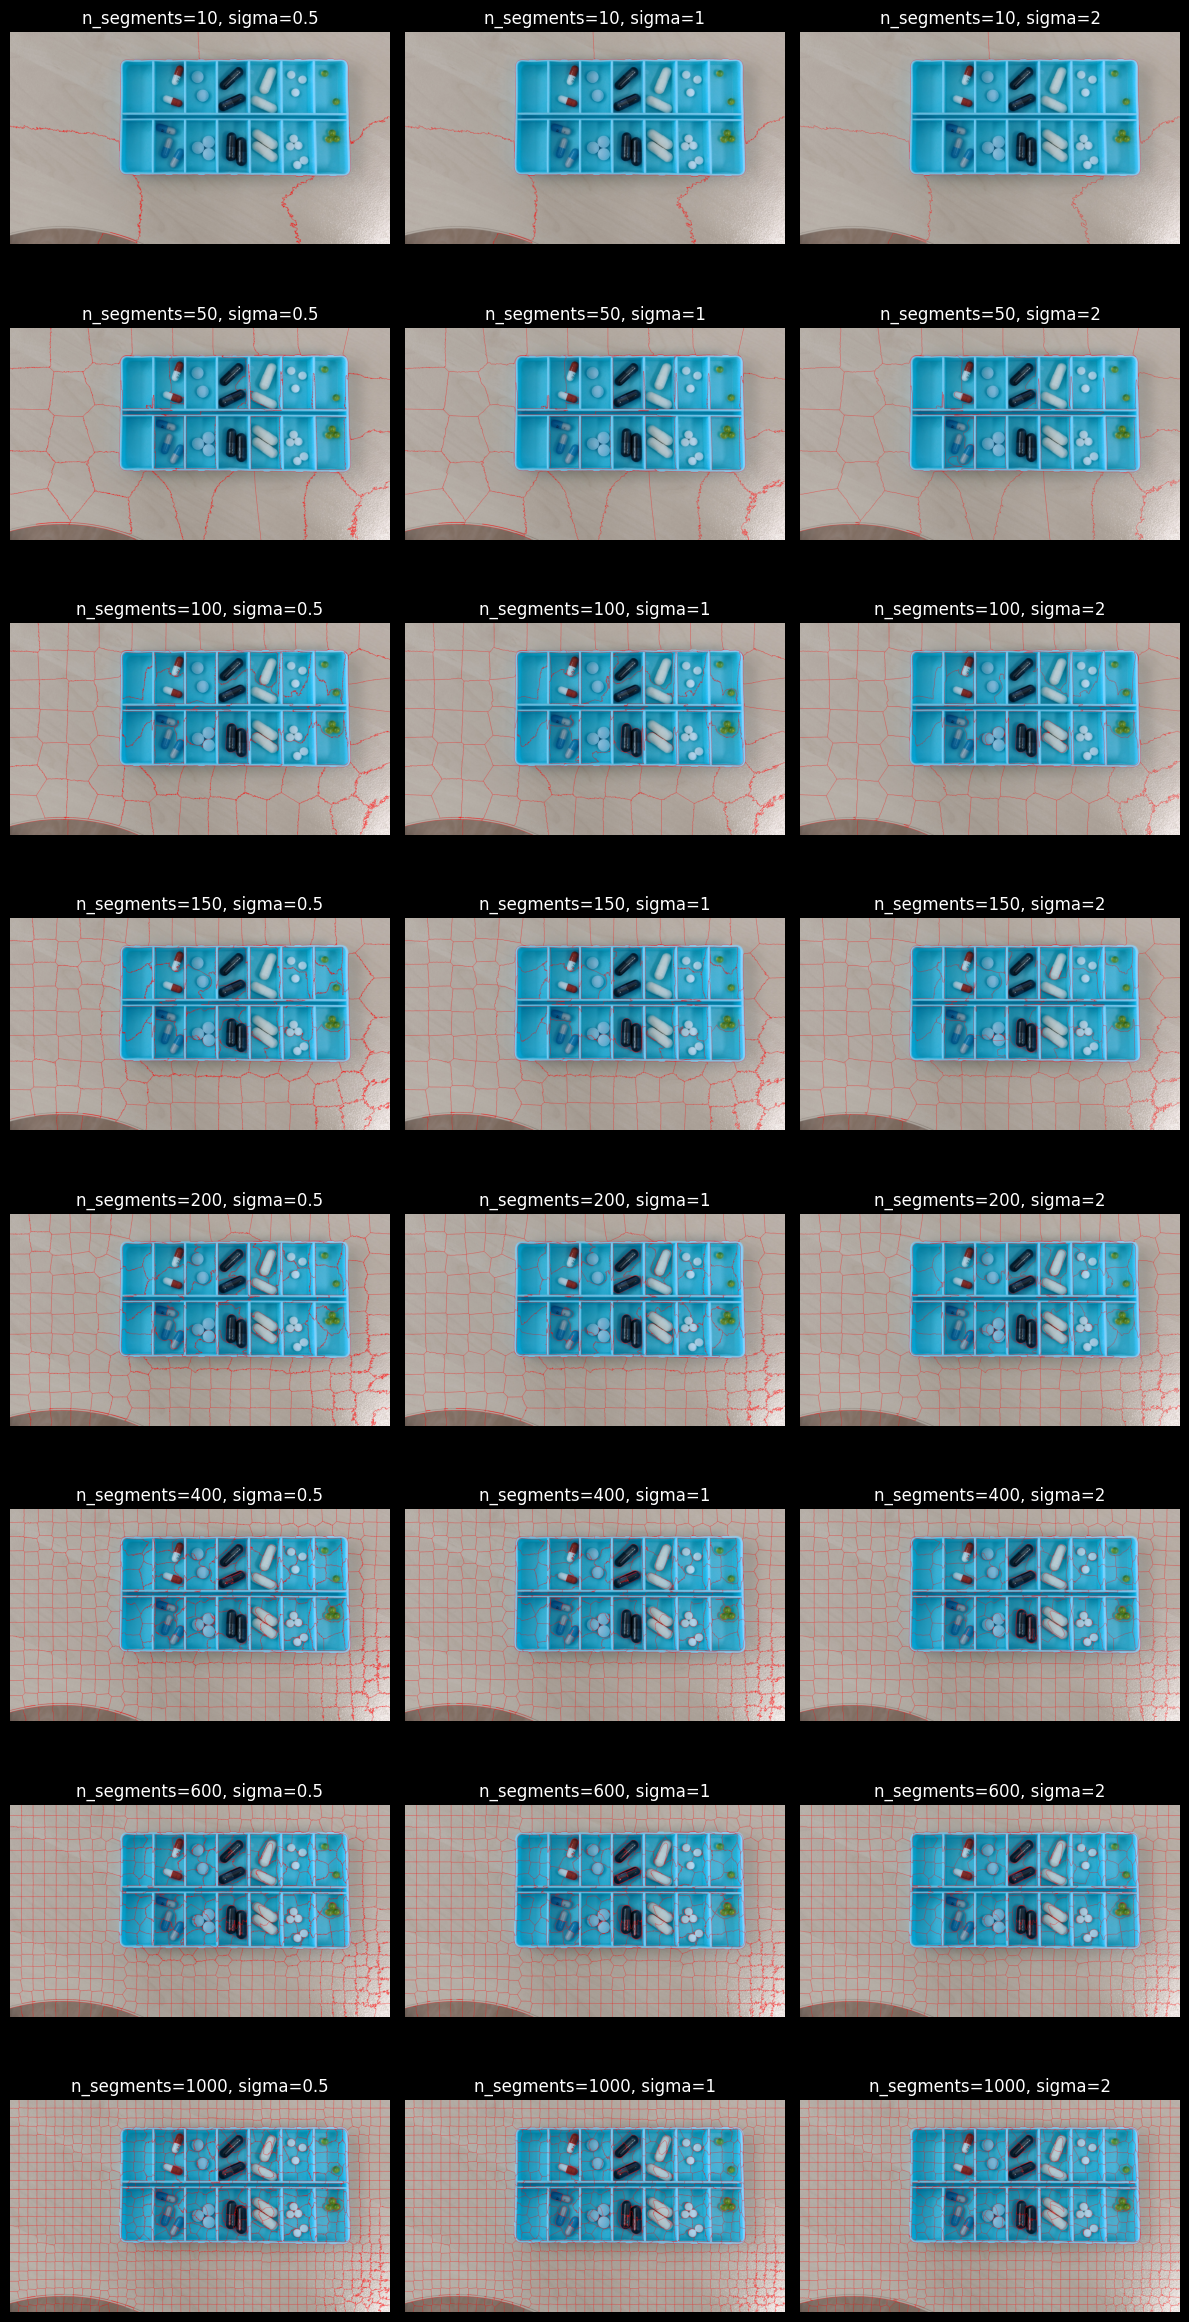

In [14]:
n_segments_values = [10, 50, 100, 150, 200, 400, 600, 1000] 
sigma_values = [0.5, 1, 2]
compactness = 10

display_test_slic_parameters(pills, n_segments_values, sigma_values, compactness)

#### Zadanie 2

Dla obrazu `tabby` wykonaj post-processing segmentacji SLIC by uzyskać dwa jednorodne obszary: jeden zawierający wyłącznie kota, drugi zawierający wyłącznie tło.

Można to zadanie potraktować jako binaryzację na poziomie superpikseli i zrealizować je za pomocą progowania. 
Można też potraktować je jako klasteryzację superpikseli i wykorzystać np. [`cv2.kmeans`](https://docs.opencv.org/4.x/d5/d38/group__core__cluster.html#ga9a34dc06c6ec9460e90860f15bcd2f88).  
Niezależnie od wybranej ścieżki, konieczne będzie opisanie każdego z superpikseli za pomocą jakiejś *cechy* go opisującej (lub kilku cech). Najprostszymi cechami mogą być np. średnie wartości składowych barwy pikseli wchodzących w skład superpiksela.  
Do zastanowienia: jakie parametry SLICa wybrać jako podstawę w tym zadaniu?

Zaprezentuj wyniki albo za pomocą `mark_boundaries` albo wyświetlając maskę binarną.

---

NumPy pro-tip: aby uzyskać zbiór wszystkich pikseli obrazu o wartości np. 3 możesz użyć notacji: ```obraz==3```. Wynikiem jest macierz boolowska, której można używać jako selektor. Np. aby na obrazie `A` wyzerować wszystkie piksele, którym w obrazie `B` odpowiada wartość 5, możesz napisać:  
```A[B==5] = 0```  
Ten zapis jest **znacznie** szybszy niż manualne iterowanie po obrazach i sprawdzanie warunków if-ami.

---

Przykładowe użycie `cv2.kmeans` (więcej możesz poczytać np. [tutaj](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)):
```python
c, labels, centers = cv2.kmeans(
    data=data,  # np.ndarray typu float o wymiarach NxK gdzie N to liczba sampli (u nas: superpikseli), K - liczba cech
    K=2,        # oczekiwana liczba klastrów
    bestLabels=None,
    criteria=(cv2.TERM_CRITERIA_EPS, 10, 1.0),  # przykładowe kryteria stopu
    attempts=1, # liczba powtórzeń algorytmu
    flags=cv2.KMEANS_RANDOM_CENTERS  # sposób inicjalizacji klastrów
)
```

Funkcja ta zwraca krotkę, której najważniejszym komponentem jest ten drugi (tu: `labels`), tj. macierz o wymiarach Nx1, zawierająca indeks klastra przypisanego i-temu samplowi.

In [15]:
# zacznij od przygotowania macierzy wejściowej (data) reprezentującej superpiksele jako punkty danych

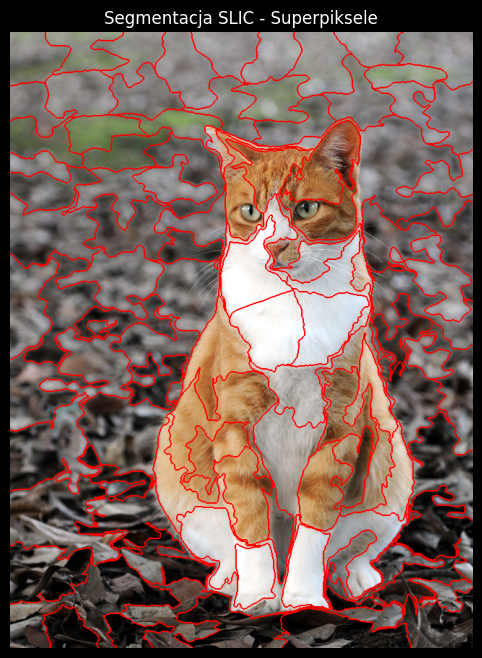

In [16]:
n_segments = 130
sigma = 2
compactness = 10

segmented_image, segments = apply_slic_segmentation(tabby, n_segments=n_segments, sigma=sigma, compactness=compactness)
plt.figure(figsize=(8,8))
plt.imshow(segmented_image)
plt.title('Segmentacja SLIC - Superpiksele')
plt.axis('off')
plt.show()

In [17]:
def extract_hsv_features(image, segments):
    """
    Extracts the mean HSV values for each superpixel.
    Returns a feature matrix where each row represents a superpixel.
    """
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    superpixel_ids = np.unique(segments)
    features = []

    for superpixel_id in superpixel_ids:
      mask = segments == superpixel_id
      mean_hsv = np.mean(hsv_image[mask], axis=0)  # mean HSV values for the superpixel
      features.append(mean_hsv)

    return np.array(features), superpixel_ids


features, superpixel_ids = extract_hsv_features(tabby, segments)


K = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, _ = cv2.kmeans(features.astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Create a binary mask using the HSV-based clustering
binary_mask = np.zeros(segments.shape, dtype=np.uint8)
for i, superpixel_id in enumerate(superpixel_ids):
  binary_mask[segments == superpixel_id] = labels[i]

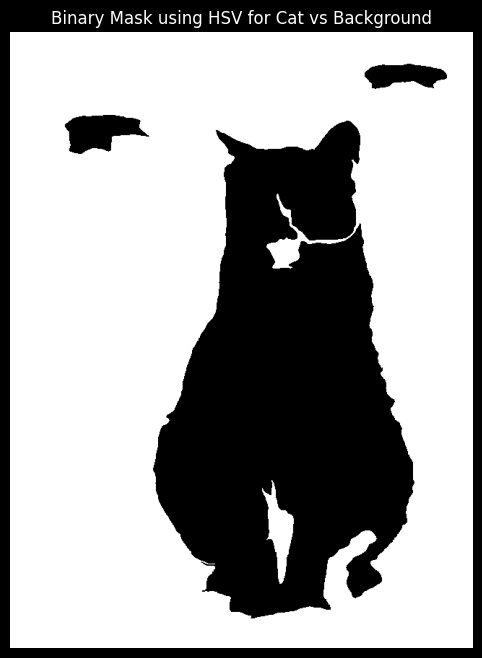

In [18]:
plt.figure(figsize=(8, 8))
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask using HSV for Cat vs Background')
plt.axis('off')
plt.show()

In [19]:
binary_mask.shape, binary_mask.dtype

((854, 641), dtype('uint8'))

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
closed_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=20)

contours, _ = cv2.findContours(closed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
largest_object_mask = np.zeros_like(closed_mask)
cv2.drawContours(largest_object_mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

highlighted_image = tabby.copy()
mask_background = largest_object_mask == 0
highlighted_image[mask_background] = (highlighted_image[mask_background] * 0.2).astype(np.uint8)  # Darken the background

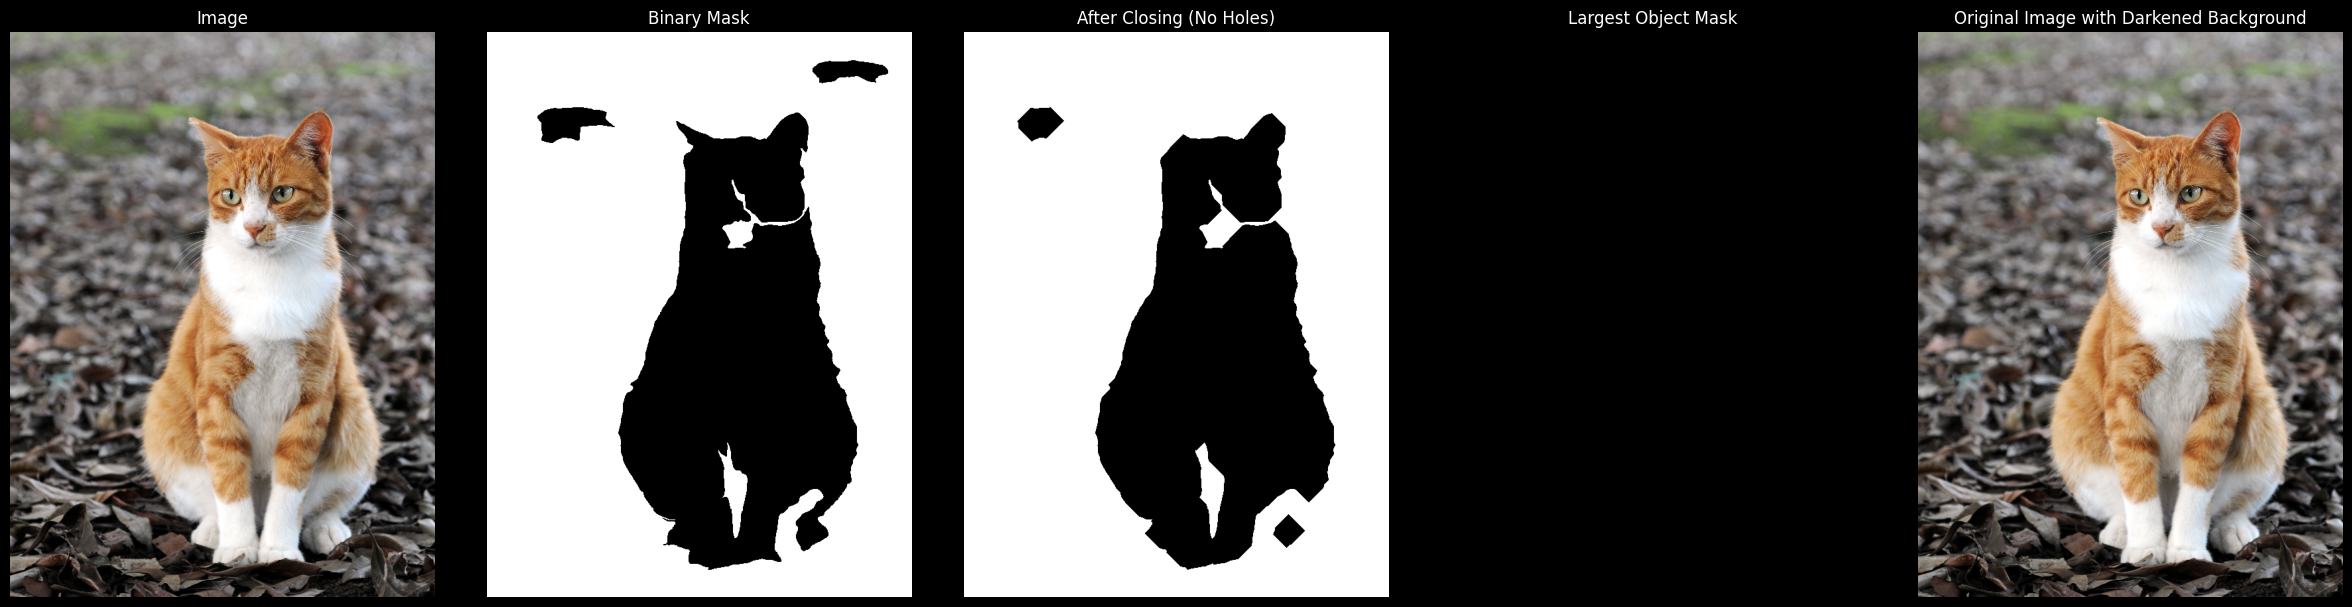

In [21]:
fig, axes = plt.subplots(1, 5, figsize=(24, 6))

axes[0].imshow(tabby)
axes[0].set_title('Image')
axes[0].axis('off')

axes[1].imshow(binary_mask, cmap='gray')
axes[1].set_title('Binary Mask')
axes[1].axis('off')

axes[2].imshow(closed_mask, cmap='gray')
axes[2].set_title('After Closing (No Holes)')
axes[2].axis('off')

axes[3].imshow(largest_object_mask, cmap='gray')
axes[3].set_title('Largest Object Mask')
axes[3].axis('off')

axes[4].imshow(highlighted_image)
axes[4].set_title('Original Image with Darkened Background')
axes[4].axis('off')

plt.tight_layout()
plt.show()

In [22]:
def display_segmentation_and_binary_masks(image, n_segments_values, sigma_values, compactness):
    fig, axes = plt.subplots(len(n_segments_values), len(sigma_values) * 2, figsize=(32, 100))
    
    for i, n_segments in enumerate(n_segments_values):
      for j, sigma in enumerate(sigma_values):
        segmented_img, segments = apply_slic_segmentation(image, n_segments=n_segments, sigma=sigma, compactness=compactness)
        
        hsv_features, superpixel_ids = extract_hsv_features(image, segments)
        
        K = 2
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        _, labels_hsv, _ = cv2.kmeans(hsv_features.astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        
        binary_mask_hsv = np.zeros(segments.shape, dtype=np.uint8)
        for k, superpixel_id in enumerate(superpixel_ids):
            binary_mask_hsv[segments == superpixel_id] = labels_hsv[k]
        
        ax_img = axes[i, j*2]
        ax_img.imshow(segmented_img)
        ax_img.set_title(f'{n_segments}, {sigma}')
        ax_img.axis('off')
        
        ax_mask = axes[i, j*2+1]
        ax_mask.imshow(binary_mask_hsv, cmap='gray')
        ax_mask.set_title(f'{n_segments}, {sigma}')
        ax_mask.axis('off')
    
    plt.tight_layout()
    plt.show()

n_segments_values = np.linspace(100, 250, 25, dtype=int)
sigma_values = [0.5, 0.75, 1, 1.5, 2]
compactness = 10 
# print(n_segments_values)

# display_segmentation_and_binary_masks(tabby, n_segments_values, sigma_values, compactness)